In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
def correlation_samples(sampleN1, sampleN2):
    # Step 1: Load the datasets c000_Satu.dat and c001_Satu.dat
    file_c000 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{sampleN1}_Satu.dat'
    file_c001 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{sampleN2}_Satu.dat'

    # Read the data from the files, treating the whitespace as delimiter and no headers
    df_c000 = pd.read_csv(file_c000, delim_whitespace=True, header=None)
    df_c001 = pd.read_csv(file_c001, delim_whitespace=True, header=None)

    # Convert the comma-separated strings in each row to a list of integers
    df_c000_clean = df_c000[0].str.split(',', expand=True).apply(pd.to_numeric)
    df_c001_clean = df_c001[0].str.split(',', expand=True).apply(pd.to_numeric)

    # Calculate the correlation between corresponding spins from c000 and c001
    correlation_matrix = df_c000_clean.corrwith(df_c001_clean)
    
    return correlation_matrix

In [58]:
sampleN1, sampleN2 = '002', '003'
file_c000 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{sampleN1}_Satu.dat'
file_c001 = f'../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4711/Configs/c{sampleN2}_Satu.dat'
# Read the data from the files, treating the whitespace as delimiter and no headers
df_c000 = pd.read_csv(file_c000, delim_whitespace=True, header=None)
df_c001 = pd.read_csv(file_c001, delim_whitespace=True, header=None)

# Convert the comma-separated strings in each row to a list of integers
df_c000_clean = df_c000[0].str.split(',', expand=True).apply(pd.to_numeric)
df_c001_clean = df_c001[0].str.split(',', expand=True).apply(pd.to_numeric)

# Step 2: Align the rows (start from row 0 of c000, ignore first and last row of c001)
df_c001_clean_shifted = df_c001_clean.iloc[1:-1].reset_index(drop=True)

# Calculate the correlation between corresponding spins from c000 and c001
correlation_matrix = df_c000_clean.corrwith(df_c001_clean_shifted)

# Print the result of the correlation matrix
print("Correlation between c000 and adjusted c001 (ignoring first and last rows):")
print(correlation_matrix.max())

Correlation between c000 and adjusted c001 (ignoring first and last rows):
0.18940312447608218


/tmp/ipykernel_245390/347445479.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_c000 = pd.read_csv(file_c000, delim_whitespace=True, header=None)
/tmp/ipykernel_245390/347445479.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_c001 = pd.read_csv(file_c001, delim_whitespace=True, header=None)


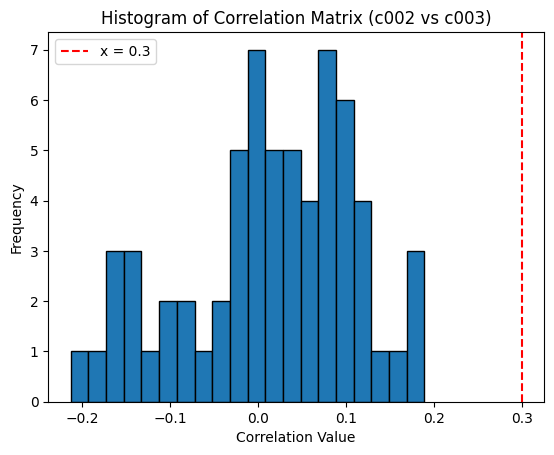

In [59]:

plt.hist(correlation_matrix, bins=20, edgecolor='black')

# Adding a vertical line at x = 0.3
plt.axvline(x=0.3, color='red', linestyle='--', label='x = 0.3')
#plt.axvline(x=-0.3, color='red', linestyle='--', label='x = 0.3')

# Adding labels and legend
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Correlation Matrix (c{sampleN1} vs c{sampleN2})')
plt.legend()

# Display the plot
plt.show()

/tmp/ipykernel_245390/693562360.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_c000 = pd.read_csv(file_c000, delim_whitespace=True, header=None)
/tmp/ipykernel_245390/693562360.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_c001 = pd.read_csv(file_c001, delim_whitespace=True, header=None)


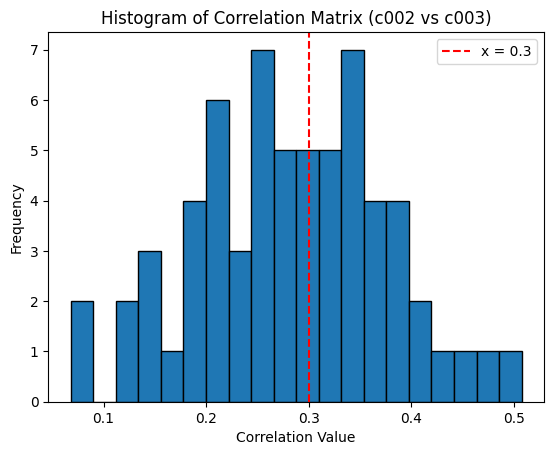

In [52]:
# Plotting the histogram of the correlation matrix values for c003 and c004
sampleN1, sampleN2 = '002', '003'
plt.hist(correlation_samples(sampleN1, sampleN2), bins=20, edgecolor='black')

# Adding a vertical line at x = 0.3
plt.axvline(x=0.3, color='red', linestyle='--', label='x = 0.3')
#plt.axvline(x=-0.3, color='red', linestyle='--', label='x = 0.3')

# Adding labels and legend
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of Correlation Matrix (c{sampleN1} vs c{sampleN2})')
plt.legend()

# Display the plot
plt.show()
